# A Statistical Analysis of the Golden State Warriors

In [12]:
import urllib2
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import numpy as np

In [13]:
def create_dictionary(urls):
    d = dict()

    for url in urls:
        content = urllib2.urlopen(url).read()
        soup = BeautifulSoup(content, 'html.parser')
        for i in xrange(30):
            L = soup.find(string=str(i+1)).parent.parent.contents
            if not d.has_key(L[3].string):
                d[L[3].string] = []
            d[L[3].string].append(float(L[5].string))
            
    return d

In [30]:
def scrape_shootper():
    # Kept separate because scraping is different
    shootper_urls = ['https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2012-06-21',
            'https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2013-06-20',
            'https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2014-06-15',
            'https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2015-06-16',
            'https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2016-06-20',
            'https://www.teamrankings.com/nba/stat/true-shooting-percentage?date=2017-02-14']
    shootper_d = dict()
    
    for url in shootper_urls:
        content = urllib2.urlopen(url).read()
        soup = BeautifulSoup(content, 'html.parser')
        for i in xrange(30):
            L = soup.find(string=str(i+1)).parent.parent.contents
            if not shootper_d.has_key(L[3].string):
                shootper_d[L[3].string] = []
            shootper_d[L[3].string].append(float(L[5].string[:-1]))
    # End of separate
    return shootper_d

In [31]:
def scrape(stat):
    begin_urls = ['https://www.teamrankings.com/nba/stat/']
    end_urls = ['?date=2005-06-24', '?date=2006-06-21', '?date=2007-06-15', '?date=2008-06-18', '?date=2009-06-15',
                '?date=2010-06-18', '?date=2011-06-12', '?date=2012-06-21', '?date=2013-06-20', '?date=2014-06-15',
                '?date=2015-06-16', '?date=2016-06-20', '?date=2017-02-14']
    
    urls = []
    for i in xrange(len(end_urls)):
        urls.append(begin_urls[0] + stat + end_urls[i])
    
    d = create_dictionary(urls)
    
    return d

In [57]:
def plot(d, ylabel, pltUP=False, shootper=False):
    plt.figure(figsize=[15,6])
    total = np.zeros(2018-2005)

    x = range(2005, 2018)
    if shootper:
        x = range(2012, 2018)
        total = np.zeros(2018-2012)
    for key in d.keys():
        total += np.array(d[key])
        if key == "Golden State" or key == "Utah" or key == "Phoenix":
            continue
        else:
            #continue
            plt.plot(x, d[key], color='grey', alpha=.5)


    average = total / 30.
    plt.plot(x, average, color='black', lw=4, label='League Average')
    plt.plot(x, d["Golden State"], color='blue', lw=4, label='Golden State Warriors')
    if pltUP:
        plt.plot(x, d["Utah"], color='red', lw=3, label='Utah')
        plt.plot(x, d["Phoenix"], color='green', lw=3, label='Phoenix')
    else:
        plt.plot(x, d["Utah"], color='grey', alpha=.5)
        plt.plot(x, d["Phoenix"], color='grey', alpha=.5)

    plt.xlabel("Season")
    plt.ylabel(ylabel)
    if shootper:
        plt.xlim((2004, 2018))
    plt.legend(loc='upper left')
    plt.show()

In [33]:
d3 = scrape_shootper()

In [35]:
d1 = scrape('assists-per-game')

In [37]:
d2 = scrape('points-per-game')

In [38]:
d4 = scrape('turnovers-per-game')

## Overview

The Golden State Warriors have become an NBA powerhouse in the last few years. They have set record after record, including most famously when they bested the record of 72 wins in a season, formerly held by Michael Jordan and the '96 Chicago Bulls. Part of the reason for this was the hiring of head coach Steve Kerr in 2014. His arrival marked a new era in Golden State Warrior basketball, as the tactics he employs are different from what happens in the rest of the league. We examine the statistics behind their recent success. 

## Unselfish Basketball

The most statistically striking and most important reason behind the Warriors success is their drastic superiority in assists per game over the other teams in the NBA. As we see in the following figure, the Golden State Warriors are vastly superior in this category to all other current NBA teams. Note that in addition to that, they are far superior to even the highest averages put up by other teams in past seasons. Utah and Phoenix were able to dominate in this category a few years ago, but even the peaks of these teams' successes are dwarfed by the current numbers being put up by the Golden State Warriors.

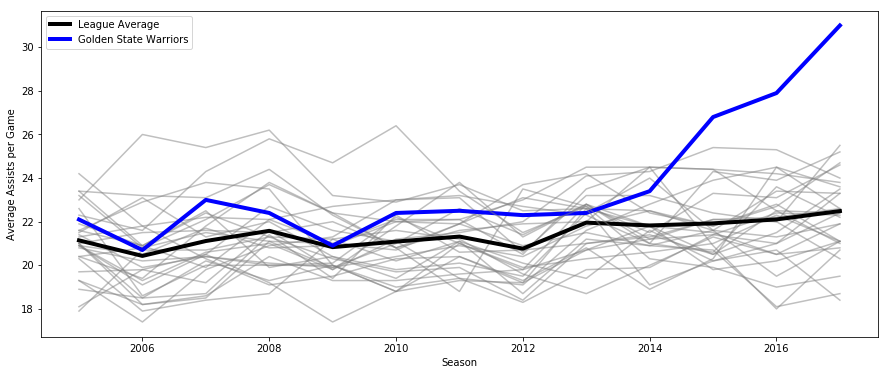

In [58]:
plot(d1, "Average Assists per Game", False)

In addition to having a ridiculously high assist rate, the Golden State Warriors also tend to have a fairly high turnover rate. This is due to the fact that the team plays with a lot more passing and ball movement than most teams do, making them more likely to get an assist, but also more suceptible to turnovers. 

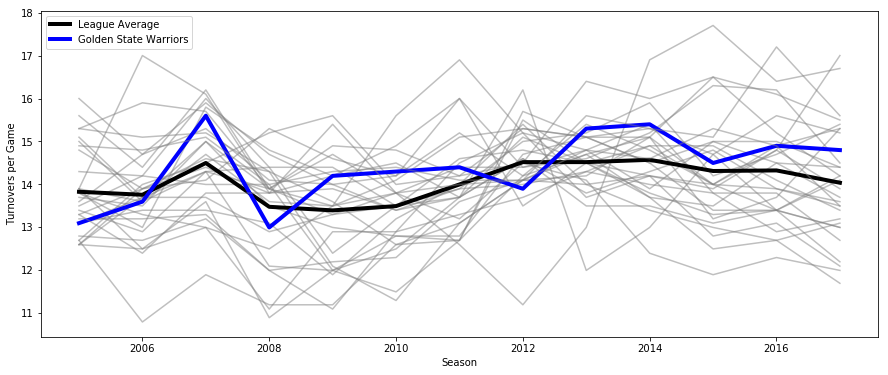

In [59]:
plot(d4, "Turnovers per Game")

## Results of the Playing Style

### Positives

We now examine the results of Golden State Warrior's playing style. For the past few seasons, the Warriors have led the league in points per game. This number has been steadily increasing for the past five years, and shows just how effective their playing style is. This is especially true considering that even the most dominant teams in this category about ten years ago (this time including Golden State) do not reach the levels they are hitting today. 

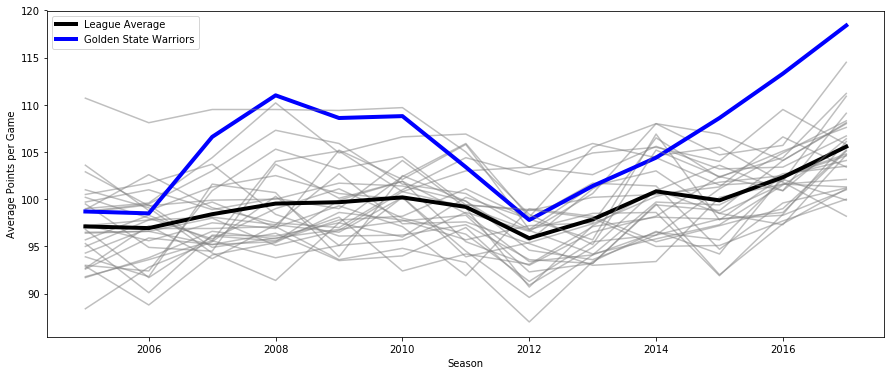

In [60]:
plot(d2, "Average Points per Game")

In addition, the team's true shooting percentage, a ranking that began to be tracked only a few years ago to more accurately judge shooting percentage, is also significantly higher than the rest of the teams in the league. This is likely due to the fact that more ball movement often leads to more open shots, and therefore a better chance of scoring. 

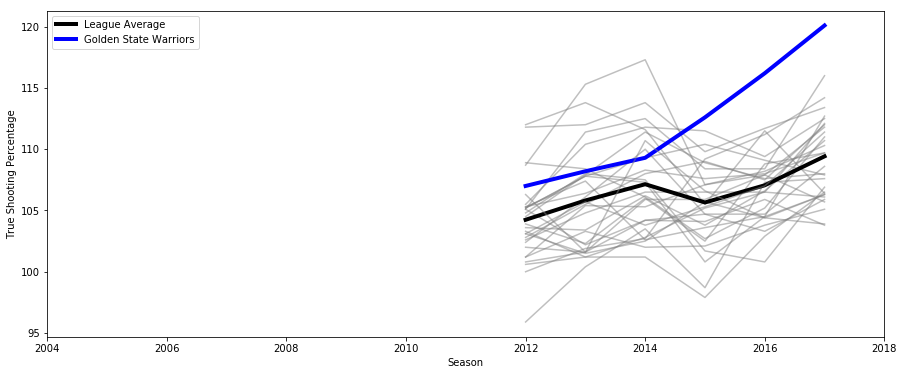

In [61]:
plot(d3, "True Shooting Percentage", shootper=True)

Another interesting statistic in which the Warriors have done very well is defensive rebounds. There may or may not be a connection to the increased amount of passing, but they are succeeding in this area nonetheless.

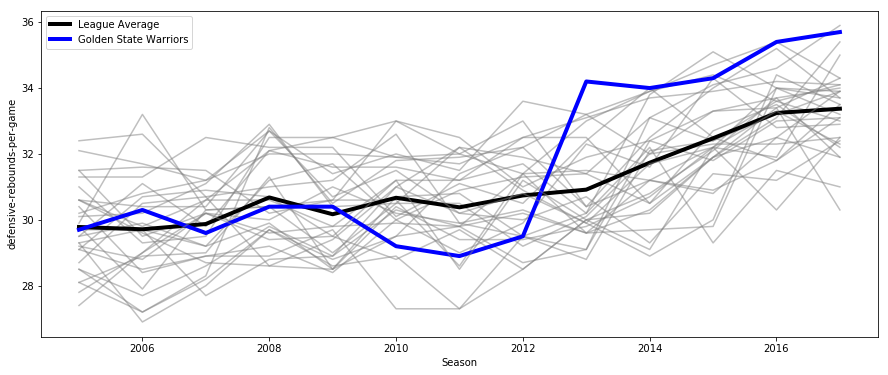

In [62]:
s = 'defensive-rebounds-per-game'
plot(scrape(s), s)

Annother area in which the Warriors are perfoming well is in steals per game. Once again, there may or may not be a connection to the passing.

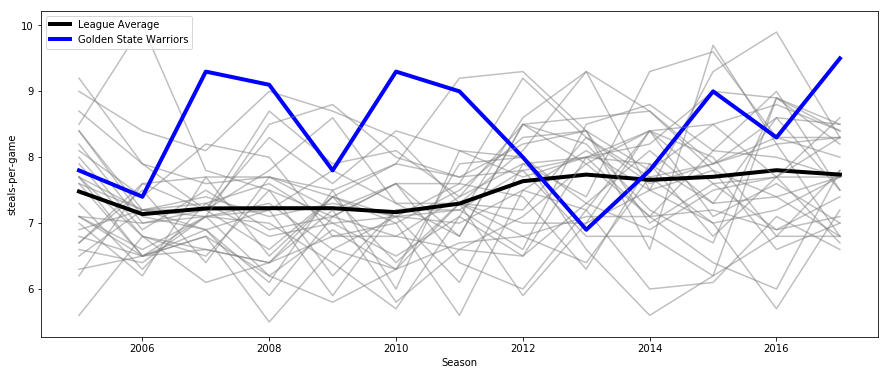

In [63]:
s = 'steals-per-game'
plot(scrape(s),s)

### Negatives

There are however, downsides to the more pass-oriented style of play. One of these is that the desire for more passing often leads to smaller, more technical players on the court, and not as many large physical players. This affects the Warrior's ability to get offensive rebounds, and we see this in the following graph. Note the decrease in offensive rebounds corresponds to the same time as the sharp increase in assists.

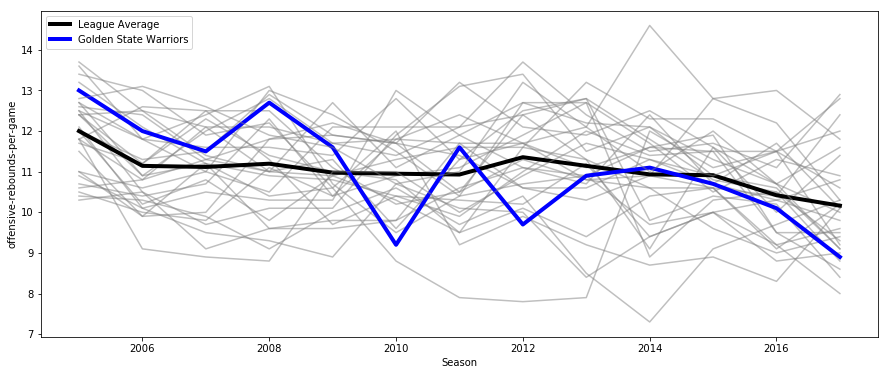

In [64]:
s = 'offensive-rebounds-per-game'
plot(scrape(s), s)

Another negative result of the higher passing rate is that the ball is loose more, resulting in higher opportunities for opponents to steal the ball. As we see in the following graph, Golden State has one of the highest rates of allowing opponents to steal the ball out of any other team in the league.

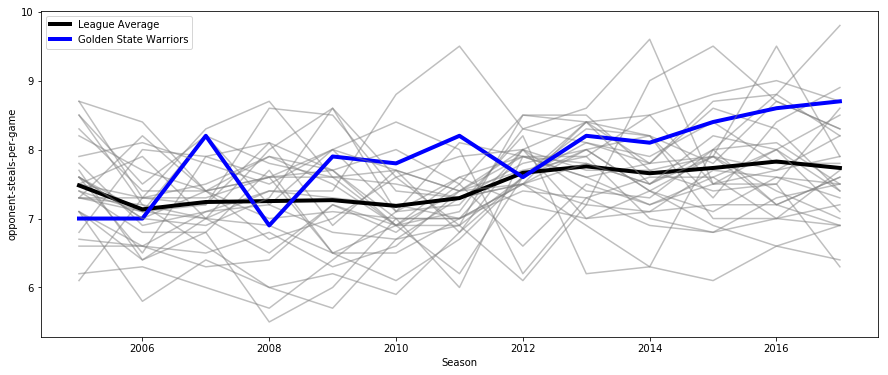

In [66]:
s = 'opponent-steals-per-game'
plot(scrape(s), s)

## Conclusion

The higher tempo, higher passing rate style of play is certainly exciting to watch, and it can be risky at times as we have seen. While there may be a few downsides to the method employed by the Golden State Warriors since they hired Steve Kerr as their head coach, overall the results have been very good. Really, what matters is winning, and they have definitely done that. We conclude with this final graph of win percentage, demonstrating just how good they've been.

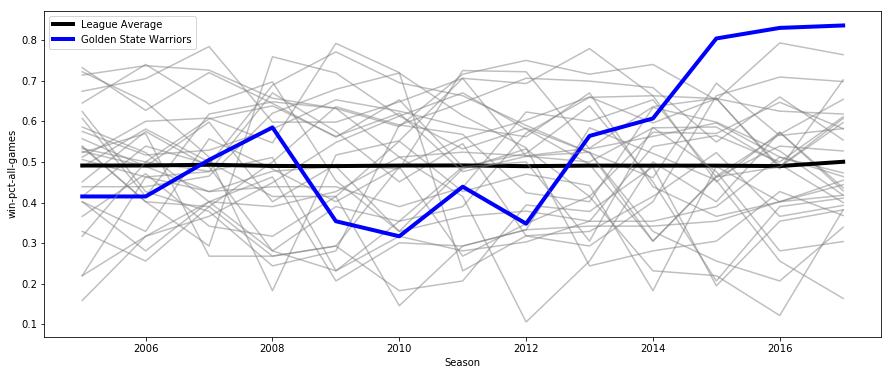

In [65]:
s = 'win-pct-all-games'
plot(scrape(s), s)